In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist=fetch_openml('mnist_784', version=1, return_X_y=False)

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
mnist.target.shape

(70000,)

In [6]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
mnist.target[0]

'5'

In [8]:
#mnist.data[0]

In [9]:
from sklearn.utils import resample

In [1]:
data,target=resample(mnist.data,mnist.target,n_samples=5000) 
#c'est la même chose que précédement pour faire un &chantillon de 500, mais là, on n'est sûr de ne pas avoir de redite

NameError: name 'resample' is not defined

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(data,target,train_size=0.8) #on partage en train set et test set

In [13]:
from sklearn import neighbors

In [14]:
model = neighbors.KNeighborsClassifier(n_neighbors=3)

In [15]:
model.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
model.predict([xtest[3]])

array(['9'], dtype=object)

In [17]:
ytest[3]

'9'

In [18]:
model.score(xtest,ytest)

0.938

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
ypred=model.predict(xtest)

In [21]:
cm = confusion_matrix(ytest, ypred)

In [22]:
def plot_confusion_matrix(ytest, ypred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    title = 'Normalized confusion matrix'
        
    # Compute confusion matrix
    cm = confusion_matrix(ytest, ypred)
    

    fig, ax = plt.subplots()
    im = ax.imshow(cm,interpolation='nearest',cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]+2),
           yticks=np.arange(cm.shape[0]+2),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    #fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i in range(0,cm.shape[0]):
        for j in range(0,cm.shape[1]):
            ax.text(j+1, i+1, format(cm[i, j],'2d'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    ax.text(10, 10, format(cm[9, 9],'2d'),ha="center", va="center",
                    color="black" )
    fig.tight_layout()
    return ax

In [23]:
class_names = ['-','0','1','2','3','4','5','6','7','8','9','-']

In [24]:
cm

array([[ 93,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,  89,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   3, 101,   1,   1,   0,   1,   0,   0,   1],
       [  0,   0,   0, 102,   0,   2,   0,   0,   0,   0],
       [  0,   2,   1,   1,  92,   0,   0,   0,   0,   8],
       [  1,   0,   0,   2,   0,  93,   0,   0,   0,   2],
       [  3,   0,   0,   0,   0,   0,  88,   0,   0,   0],
       [  0,   2,   0,   0,   1,   0,   0, 107,   0,   4],
       [  0,   5,   1,   6,   1,   5,   0,   1,  89,   1],
       [  0,   2,   0,   1,   1,   0,   0,   0,   0,  84]])

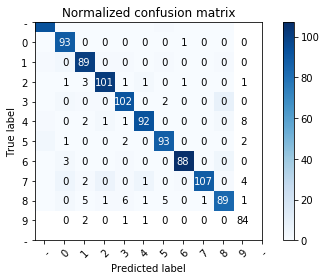

In [25]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(ytest, ypred, classes=class_names,
                      title='Confusion matrix, without normalization \n')

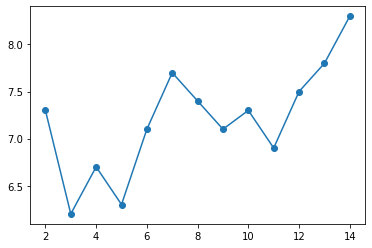

In [26]:
errors=[]
for k in range(2,15):
    knn=neighbors.KNeighborsClassifier(n_neighbors=k)
    errors.append(100*(1-knn.fit(xtrain,ytrain).score(xtest,ytest)))
plt.plot(range(2,15),errors,'o-')
plt.show()

In [27]:
# On récupère le classifieur le plus performant odnc ici c'est 5
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
images = xtest.reshape((-1, 28, 28))



In [28]:
# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

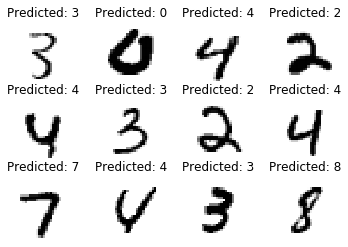

In [29]:
# On affiche les images avec la prédiction associée
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: %s' % predicted[value])

plt.show()

In [30]:
# on récupère les données mal prédites 
misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

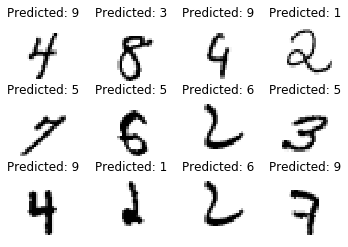

In [31]:
# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: %s' % misclass_predicted[value])

plt.show()

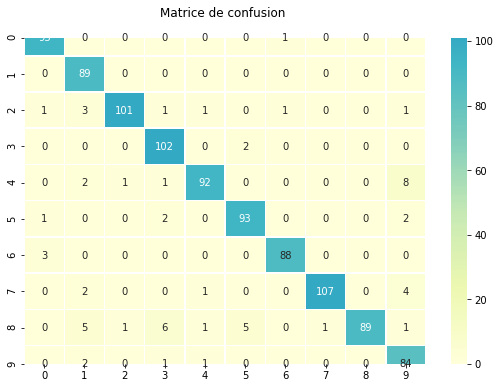

In [32]:
f, ax = plt.subplots(figsize=(9, 6))
ax.set(title='Matrice de confusion \n',
           ylabel='True label',
           xlabel='\n Predicted label')
sns.heatmap(cm, annot=True, fmt="d",linewidths=0.5,cmap="YlGnBu",center=cm[5, 5],robust=True,mask=False,ax=ax)